# 5. 뉴스 카테고리 다중분류

## 5-1. 들어가며

### 머신러닝을 이용한 텍스트 분류
---
텍스트 분류(Text Classification)란 주어진 텍스트를 사전 정의된 클래스(Pre-defined Class)들로 분류하는 자연어 처리 태스크입니다. 이 태스크는 자연어 처리 태스크 중 가장 기본이 되면서, 비즈니스 영역에서도 가장 수요가 높습니다.

우리가 평소에 쉽게 접할 수 있는 텍스트 분류의 영역으로는 '스팸 메일 자동 분류', '사용자의 리뷰로부터 긍정, 부정을 판단하는 감성 분류', '포털 사이트가 언론사의 뉴스들을 문화, 정치 등으로 자동 분류하여 보여주는 뉴스 카테고리 분류' 등이 있습니다.

이러한 분류들을 AI 알고리즘을 통해 수행할 때는 일반적으로 아래와 같은 과정을 거칩니다.

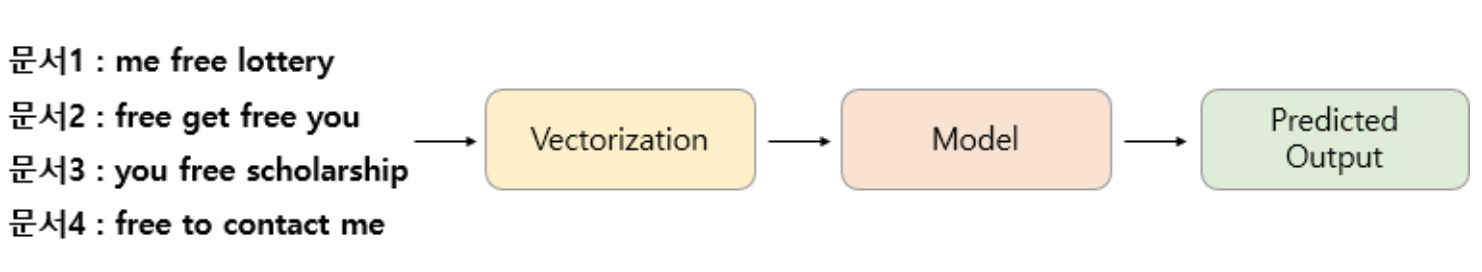

주어진 문장 또는 문서를 벡터화하고, 이를 AI 모델에 입력값으로 넣어주면 모델은 예측한 카테고리를 리턴하게 되죠. 만약 딥러닝 모델을 사용한다면 벡터화 방법으로는 워드 임베딩을 사용하고, RNN, CNN, BERT와 같은 딥러닝 모델을 사용해서 클래스를 예측할 수 있을 거예요.

하지만 AI 알고리즘에는 딥러닝이 아닌 다른 우수한 수많은 머신러닝 알고리즘들도 존재합니다. 오늘은 딥러닝이 아니라 여러 머신러닝 알고리즘을 사용해서 텍스트를 분류해 보겠습니다. 딥러닝을 사용하지 않는 상황에서 텍스트를 벡터화하여 좋은 feature를 뽑아내기 위해, 이전 노드에서 다루었던 내용들이 어떻게 활용되는지 경험해 볼 수 있을 것입니다.

텍스트 분류에는 여러 종류가 있는데, 그 중 대표적인 것으로는 클래스가 2개인 경우인 이진 분류(Binary Classification)와 클래스 3개 이상인 경우인 다중 클래스 분류(Multiclass Classification)가 있습니다. 메일이 스팸인지 아닌지를 결정하는 스팸 메일 분류기가 이진 분류의 대표적인 예입니다. 오늘 우리가 하게 될 텍스트 분류는 다중 클래스 분류(Multiclass Classification)에 속하는데 구체적인 내용은 데이터를 살펴보면서 이해해 보겠습니다.

### 학습 내용
---
1. 로이터 뉴스 데이터 (1) 데이터 확인하기
- 데이터를 확인하고 분포를 확인합니다.
2. 로이터 뉴스 데이터 (2) 데이터 복원하기
- 원본 뉴스 데이터로 복원합니다.
3. 벡터화 하기
- 벡터화를 진행합니다.
4. 나이브 베이즈 분류기
- 사이킷런을 통한 나이브 베이즈 분류기를 학습합니다.
5. F1-Score, Confusion Matrix
- 다양한 성능 평가 지표를 학습합니다.
6. 다양한 머신러닝 모델 사용해보기 (1)
- 좋은 성능을 얻기 위한 여러 다른 모델들을 학습합니다.
7. 다양한 머신러닝 모델 사용해보기 (2)
- 좋은 성능을 얻기 위한 여러 다른 모델들을 학습합니다.

### 학습 목표
---
이번 시간의 목표입니다.

- 로이터 뉴스 데이터 이해하고 분포를 확인할 수 있습니다.
- F1-score와 confusion matrix 출력할 수 있습니다.
- 여러 머신러닝 모델에 대해서 성능 비교하여 사용할 수 있습니다.

## 5-2. 로이터 뉴스 데이터 (1) 데이터 확인하기

우리가 사용할 데이터는 로이터 뉴스 데이터입니다. 이 데이터는 총 46개의 클래스로 구성되며, 해당 뉴스가 어느 카테고리에 속하는지를 예측하기 위한 데이터입니다. 텐서플로우 데이터셋에서 제공하고 있는 데이터로 아주 쉽게 다운로드가 가능합니다.

In [ ]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print('=3')

### 훈련 데이터와 테스트 데이터 로드하기
---
로이터 뉴스 데이터를 훈련 데이터와 테스트 데이터로 나누어 변수에 각각 저장합니다.

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

num_words는 이 데이터에서 빈도수 기준으로 상위 몇 번째 단어까지 사용할 것인지 조절합니다. 각 단어는 고유한 번호가 정해져 있는 상태이고, 이를 통해서 사용할 단어의 수를 정합니다.

이 데이터의 단어들은 등장 빈도수가 높은 순서대로 낮은 정수가 맵핑되어 있습니다. 예를 들어서 50번 단어보다는 10번 단어가 데이터 전체에서 빈도수가 등장 빈도 순위로 40등이 더 높은 단어입니다. 위에서 num_words=10000은 1~10,000번 단어만 사용한다는 의미입니다. 등장 빈도수가 높은 단어들만 사용하겠다는 의미지요.

주의할 점은 데이터를 받아올 때, num_words의 인자로 10,000을 기재한다고 해서 10,000보다 높은 정수가 맵핑된 단어들이 받아온 데이터에서 사라지는 게 아니라는 겁니다. num_words로 주어진 값보다 큰 번호를 가졌던 단어들은 특정 번호로 전부 맵핑이 됩니다. 이는 OOV 문제라는 자연어 처리의 대표적인 문제와 연관이 있는데요. 이에 대해서는 뒤에서 언급하겠습니다.

test_split = 0.2는 전체 데이터 중에서 80%를 훈련 데이터, 20%를 테스트 데이터로 사용한다는 의미입니다. x_train과 x_test는 훈련용 뉴스 데이터와 테스트용 뉴스 데이터, y_train과 y_test는 훈련용 뉴스 데이터의 레이블와 테스트용 뉴스 데이터의 레이블이 되는 것이지요.

이렇게 받아온 데이터가 어떤 구성을 가지고 있는지 출력해 볼까요?

In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

### 데이터 출력해보기
---
훈련용 뉴스는 8,982개. 그리고 테스트용 뉴스는 2,246개가 있네요. 8:2의 비율을 가지는데, 첫 번째 훈련용 뉴스와 첫 번째 테스트용 뉴스를 출력해 보겠습니다.





In [ ]:
print(x_train[0])
print(x_test[0])

우리는 뉴스 데이터를 다루기로 했는데, 실제 출력해보면 텍스트가 아니라 숫자 시퀀스가 출력됩니다. 각 단어가 빈도수가 높은 순서대로 낮은 정수가 맵핑되어 있다고 했었는데, 이미 뉴스 데이터를 다운로드할 때는 단어가 아니라 해당 번호로 변환이 되어서 출력됩니다.

대부분의 자연어 처리에서는 텍스트를 숫자로 수치화하는 과정이 필요한데, 텐서플로우 데이터셋에서는 이미 전처리를 한 데이터를 제공해 주는 셈입니다.

이제 레이블도 출력해 볼까요? 첫 번째 훈련용 뉴스와 테스트용 뉴스의 레이블을 출력해봅시다.

In [ ]:
print(y_train[0])
print(y_test[0])

둘 다 숫자 3이 출력되네요. 각 뉴스는 정수로 된 레이블을 가지고 있군요. 이 레이블은 숫자 0부터 시작되므로, 모든 레이블 중 최댓값을 구하고 1을 더하면 현재 클래스의 개수를 볼 수 있어요.

In [ ]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

이 뉴스 데이터는 총 46개의 클래스를 가지고 있습니다. 이 정도면 적지는 않은 클래스라서 높은 정확도를 얻는 일이 쉽지는 않을 것 같은 예감이 드네요.

### 데이터 분포 확인해보기
---
자연어 처리 과정에서 문장과 문서들의 길이는 보통 다릅니다. 우리가 평소에 보는 뉴스 기사의 길이가 항상 똑같지는 않죠. 이 데이터도 마찬가지예요. 모든 뉴스 데이터들은 길이가 다 다를 거예요. 뉴스 데이터의 길이 분포를 볼까요?

In [ ]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

길이가 가장 긴 뉴스의 길이는 2,376입니다. 평균 길이는 145구요. 아무래도 길이가 가장 긴 뉴스의 길이가 다른 뉴스에 비해 유독 긴 편인 것 같습니다. 시각화된 그래프의 분포로 봤을 때 500~1,000 사이의 길이를 가지는 뉴스도 일부 있어 보이죠?

우리가 맞춰야 하는 클래스의 분포를 확인해볼까요? 모델의 성능에 영향을 줄 수 있는 요소이기 때문에 실제로 모든 클래스가 다 존재는 하는 것인지, 또 어떤 클래스가 유독 많은지와 같은 것들을 사전에 확인해 보아야 합니다.

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

이 뉴스 데이터는 3번, 4번 클래스가 대부분을 차지하고 있습니다. 그 뒤로는 19번, 16번, 1번, 11번 등이 높은 분포를 가지고 있네요. 시각화를 통해 어떤 클래스가 많고, 적은 것을 쉽게 확인할 수는 있었지만 수치적으로 정확히 몇 개인지도 출력해보겠습니다.

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

3번, 4번 클래스의 경우에는 각각 3,159개와 1,949개가 존재합니다. 그 뒤로는 549개로 19번 클래스가 세 번째로 많고, 16번 클래스가 444개로 네 번째로 많네요. 이렇게 각 클래스가 몇 개가 존재하는지도 확인해 봤어요.

## 5-3. 로이터 뉴스 데이터 (2) 데이터 복원하기

### 원본 뉴스 데이터로 복원해보기
---
이번에는 조금은 일반적이지 않은 전처리를 해볼 겁니다! 이 데이터는 이미 어느 정도 전처리가 되어서 각 단어가 정수 시퀀스로 변환된 채 제공되고 있다고 언급했었어요. 하지만 일반적인 상황이라면 텍스트를 숫자로 수치화하는 과정을 처음부터 해야 합니다.

그래서 우리는 여기서 정수 시퀀스로 변환된 데이터를 '굳이' 다시 텍스트로 돌려보겠습니다.

로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공합니다. 이를 word_index로 저장해보겠습니다.

In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

이게 이 데이터의 단어장(Vocabulary) 입니다. 이제 word_index 안에 단어를 입력하면 이 단어가 어떤 정수와 맵핑이 되는지를 알 수 있습니다. 단어 'the'는 어떤 정수와 맵핑이 될까요?

In [ ]:
word_index['the']

단어 'the'는 정수 1과 맵핑이 됩니다. 그렇다면 단어 'it'은 어떤 정수와 맵핑이 될까요?





In [ ]:
word_index['it']

단어 'it'은 정수 13과 맵핑이 됩니다. 다른 단어들도 시도해 보세요!

그런데 지금 우리가 해야 할 일은 현재 갖고 있는 정수 시퀀스로 되어 있는 데이터를 텍스트 형태로 되돌려야 하는 일이므로 사실 word_index보다는 정수로부터 단어를 얻을 수 있는 index_word가 필요합니다.

그런데 이 데이터에는 숨겨진 비밀이 하나 있는데, 뉴스 데이터 안에서 단어 'the'는 사실 1번이 아니라 4번 단어입니다. 그리고 단어 'it'은 사실 13번 단어가 아니라 16번 단어입니다. 왜냐하면 0번, 1번, 2번은 사실 자연어 처리에 쓰이는 특별한 토큰들을 위해 맵핑된 번호이기 때문입니다. (각각 <pad>, <sos>, <unk>라는 토큰을 나타냅니다.)

그렇기 때문에, 다른 단어들도 word_index의 결과로 나오는 숫자에 3을 더해주어야 단어가 실제로 맵핑된 인덱스 값이 나옵니다. 이건 로이터 뉴스 데이터가 정의한 일종의 약속입니다.

In [ ]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

숫자 4와 16을 넣어서 the와 it이 출력되는지 확인해볼까요?





In [ ]:
print(index_to_word[4])
print(index_to_word[16])

위에서 0번, 1번, 2번 인덱스에는 각각 <pad>, <sos>, <unk>라는 특별한 토큰이 맵핑되어 있다고 했죠? 그래서 만들어진 index_to_word에 이 토큰들도 추가해주어야 진짜 index_to_word가 완성됩니다.

In [ ]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

자, 이제 index_to_word를 통해서 첫 번째 훈련용 뉴스 기사를 원래 텍스트로 복원해보겠습니다!





In [ ]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

첫 번째 훈련용 뉴스 기사가 정수 시퀀스에서 텍스트로 복원되었습니다. 이 데이터도 어느 정도 전처리가 된 상태라서, 자연스럽게 읽히지는 않습니다. 하지만 문맥을 가진 텍스트이기 때문에, 이 데이터를 가지고 머신러닝을 시작해도 별 무리는 없어 보입니다.

복원된 첫 번째 훈련용 뉴스 기사에 특별 토큰인 <sos>와 <unk>가 보이는데, <sos>는 텍스트 분류를 위한 토큰이 아니므로 크게 신경을 쓰지 않아도 됩니다. 하지만 <unk>는 자연어 처리 전반에서 쓰이는 특별 토큰이므로 이에 대해서는 이해할 필요가 있습니다.

### OOV 문제와 UNK 토큰
---
기계가 알고 있는 단어들의 집합을 단어장(Vocabulary)이라고 합니다. 기계가 미처 배우지 못한 모르는 단어를 OOV(Out-Of-Vocabulary) 또는 UNK(Unknown) 이라고 표현합니다. 어떤 단어를 기계가 모르는 단어로 판단하면, 기계는 해당 단어를 전부 <unk>라는 일관된 특별 토큰으로 변환합니다.

우리가 가장 맨 처음 사용했던 코드를 상기해 봅시다.

> (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

num_words=10000는 정수 번호가 10,000이 넘는 단어들을 자동으로 <unk> 토큰으로 처리합니다. 로이터 뉴스 데이터에서 <unk>은 정수 2번을 가지도록 약속돼 있으므로 데이터를 로드하는 과정에서 정수 번호가 10,000이 넘는 단어들은 전부 정수 2로 변환되어서 로드가 되었던 것입니다.

그럼 아래 퀴즈에 답해보세요.

Q. 로이터 뉴스 데이터 중 [4, 587, 23, 133, 6, 30, 515]인 정수 시퀀스가 있습니다.
 현재 우리가 가진 index_word를 사용하여 이 정수 시퀀스를 텍스트 시퀀스로 변환해보세요.

In [ ]:
idx = [4, 587, 23, 133, 6, 30, 515]

print(' '.join([index_to_word[index] for index in idx]))

이제 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환해 보겠습니다.





In [ ]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

In [ ]:
#test데이터도 변환해주세요!

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

각각 5개씩 출력해보고, 제대로 변환이 되었는지 확인해 보겠습니다.





In [ ]:
x_train[:5]

In [ ]:
x_test[:5]

## 5-4. 벡터화 하기

원활한 실습을 위해 아래의 도구들을 먼저 임포트 하겠습니다.





In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

텍스트 데이터가 있을 때, 모델의 입력으로 넣기 위해서는 우선 각 문서를 벡터화할 필요가 있습니다. 항상 그런 것은 아니지만, 일반적으로 텍스트 분류를 할 모델로 인공 신경망을 사용하는 경우, 벡터화 방법 또한 인공 신경망을 사용하는 것이 보편적입니다. Word Embedding, Document Embedding, Contextual Embedding 등의 다양한 벡터화 방법이 존재하는데요.

이번 실습에서는 딥러닝이 아닌 머신러닝 방법을 사용하여 텍스트 분류를 진행할 예정이기 때문에 벡터화 방법도 인공 신경망이 아닌 방법을 사용하겠습니다. 저희가 사용할 벡터화 방법은 Bag of Words 가설을 기반으로 하는
 DTM, TF-IDF 행렬입니다.

Bag of Words 가설과 이를 통해 만드는 DTM에 대한 정의는 아래의 링크를 통해 알아보겠습니다.

위키독스: 문서 단어 행렬(DTM) (https://wikidocs.net/24559)


Document Term Matrix, DTM은 사이킷런의 CountVectorizer()를 통해서 생성할 수 있습니다.

DTM을 생성하고, DTM의 크기를 확인해보겠습니다.

In [ ]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

훈련용 뉴스의 수가 총 8,982개였기 때문에 DTM의 행의 개수는 8,982개가 됩니다. 그런데 이상한 점은 앞에서 데이터를 로드할 때, num_words=10,000이라는 값을 사용했음에도 DTM 열의 개수는 이보다 현저하게 적은 9,670개밖에 되지 않습니다. 그 이유는 DTM이 자체적인 규칙에 따라서 불필요하다고 판단하는 토큰들을 제거하기 때문입니다.

DTM 행렬을 이어서 TF-IDF 행렬을 만들어보겠습니다. TF-IDF 행렬은 퀴즈 4에서 알아본 DTM의 단점을 보정해 주는 효과를 가지고 있습니다. TF-IDF 행렬에 대한 설명은 아래의 글을 참고하겠습니다.

- 위키독스: TF-IDF (https://wikidocs.net/31698)

TF-IDF Matrix는 사이킷런의 TfidfTransformer()를 통해서 생성할 수 있습니다. TF-IDF Matrix는 추가적인 전처리를 하지 않는 이상, DTM과 동일한 크기를 가집니다.

In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

## 5-5. 나이브 베이즈 분류기

### 라이브러리 불러오기
---
먼저 앞으로 사용할 다양한 머신러닝 모델의 라이브러리를 불러오겠습니다.


In [ ]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

### 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)
---
먼저 아래 영상을 통해서 나이브 베이즈 분류기에 대해 간단히 알아보고, 아래의 퀴즈를 풀어 보세요.

https://youtu.be/3JWLIV3NaoQ

Q. 모든 메일에는 같은 단어가 중복으로 등장하지 않는다고 가정하였을 때, 베이즈 정리만을 이용하여 coupon이라는 단어가 들어갔을 때 해당 메일이 스팸 메일일 확률을 구해보세요. 가정은 아래와 같습니다!

총 8개의 메일 중에 4개의 메일이 스팸 메일입니다.
전체 메일 중에서 coupon이라는 단어가 들어간 메일은 3개입니다.
모든 스팸 메일 중에서 단어 coupon이 들어간 메일은 2개입니다.

총 8개의 메일 중 4개의 메일이 스팸 메일이므로 P(spam) = 4/8 = 1/2
총 8개의 메일 중 3개의 메일이 coupon이라는 단어를 포함하므로 P(coupon) = 3/8
총 4개의 스팸 메일 중 2개의 메일이 coupon이라는 단어를 포함하므로 P(coupon | spam) = 2/4 = 1/2
P(coupon | spam)과 P(spam)를 곱한 후에 P(coupon)로 나눠줍니다.
 정답은 2/3 즉, 66.7%입니다.


 P(spam|coupon) = P(spam n coupon) / P(coupon) = P(coupon|spam) * P(spam) / P(coupon) = 2/4 * 4/8 / 3/8


 나이브 베이즈 분류기는 사이킷런의 MultinomialNB()를 통해 사용할 수 있습니다.

사이킷런이 제공하는 머신러닝 모델들은 공통적으로 fit()이라는 함수를 제공하고 있는데요. 훈련 데이터와 해당 훈련 데이터에 대한 레이블을 인자로 사용하면 모델이 이를 학습합니다.

In [ ]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

테스트 데이터에 대한 정확도를 측정하기 위해서는 훈련 데이터와 동일한 전처리를 거쳐야 합니다. 다시 말해 테스트 데이터도 TF-IDF 행렬로 변환해 주어야 합니다. 그 후 해당 행렬과 predict() 함수를 통해 예측값을 얻어 정확도를 측정합니다.

In [ ]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

약 66%의 정확도를 얻었습니다. 사실 그렇게 좋은 성능은 아닙니다. 뒤에서 다른 모델들을 통해서 더 좋은 성능을 얻기 위해서 노력해 봅시다.

나이브 베이즈 분류기가 임의의 샘플에 대해서 클래스를 정확히 예측하는지 테스트를 해보겠습니다. 네 번째 샘플(인덱스 상으로는 3)의 원문을 출력하면 다음과 같습니다.

In [ ]:
x_test[3]

In [ ]:
y_test[3]

이 샘플의 레이블은 4네요. 과연 모델은 제대로 예측하고 있는지 그리고 어느 정도의 확신을 가지고 판단하는지 모델이 결정한 확률을 그래프로 시각화해봅시다.

In [ ]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [ ]:
model.predict(tfidfv_test[3])

모델은 4번 클래스를 약 90%의 확률로 확신하는데, 10%의 확률로 3번 클래스라고 판단합니다. 90%의 확률로 확신하므로 모델이 예측한 레이블은 4번입니다. 해당 샘플은 정확하게 예측했네요.

## 5-6. F1-Score, Confusion Matrix

### 필요한 라이브러리 불러오기
---
먼저 이번 스텝에서 필요한 라이브러리를 불러오겠습니다.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

Precision, Recall & F1 Score

오늘의 실습에서는 성능 비교를 위한 척도로 정확도(Accuracy) 를 사용합니다. 하지만 Accuracy 외에 또 다른 방법에는 F1-score이 있습니다.

아래의 글을 통해서 Precision과 Recall 그리고 F1 score에 대한 설명을 읽어봅시다.

- 분류성능평가지표 - Precision(정밀도), Recall(재현율) and Accuracy(정확도) (https://sumniya.tistory.com/26)

사이킷런의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 classification_report() 함수를 제공합니다. 이 함수는 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모델의 성능을 평가합니다.

In [ ]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

최종 결과에서 각각이 의미하는 바는 다음과 같습니다.

- macro: 단순평균
- weighted: 각 클래스에 속하는 표본의 개수로 가중평균
- accuracy: 정확도. 전체 학습 데이터의 개수에서 클래스를 정확하게 맞춘 개수의 비율

### Confusion Matrix
---
Confusion Matrix는 생소한 개념이라기보다는 앞서 f1-score를 이해하기 위해 읽었던 위의 글의 가장 처음에 있던 행렬입니다. Confusion matrix를 아래의 동영상을 통해 이해해 봅시다.

https://youtu.be/M0GBAzFV9_A

지금까지 배운 내용들을 아래의 링크를 통해 간단히 정리해 보겠습니다!

Confusion Matrix (https://mjdeeplearning.tistory.com/31)


In [ ]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

In [ ]:
graph_confusion_matrix(model, tfidfv_test, y_test)

## 5-7. 다양한 머신러닝 모델 사용해보기 (1)

앞서 사용한 나이브 베이즈 분류기(MultinomialNB)로는 약 66%의 정확도밖에 얻지 못했습니다. 사실 클래스의 개수가 46개인 것을 감안해도 그리 좋은 성능은 아닙니다. 좀 더 좋은 성능을 얻기 위해서 여러 다른 모델들을 시도해 봅시다.

### Complement Naive Bayes Classifier(CNB)
---
나이브 베이지안 분류기는 독립 변수가 '조건부로 독립적'이라는 가정을 하기 때문에, 문서가 특정 분류에 속할 실제 확률을 사용할 때 문제가 발생할 수 있습니다. 예를 들어 많은 샘플(sample)이 특정 클래스에 치우쳐져 있을 경우, 결정 경계의 가중치가 한쪽으로 치우쳐져 모델이 특정 클래스를 선호할 수 있어요. 앞서 로이터 뉴스 데이터에서도 3번, 4번 클래스가 다른 클래스에 비해 상대적으로 많은 클래스를 갖고 있음을 확인했었죠.

데이터가 불균형할 경우를 대비해 나이브 베이즈 분류기를 보완한 것이 컴플리먼트 나이브 베이즈 분류기입니다. 컴플리먼트 나이브 베이즈 분류기는 데이터의 불균형을 고려하여 가중치를 부여하는 특징을 가지고 있습니다. 따라서 컴플리먼트 나이브 베이즈 분류기는 나이브 베이즈 분류기(MultinomialNB)보다 성능이 일반적으로 더 좋습니다.

In [ ]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

In [ ]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

77%의 정확도를 얻었습니다. 기존 나이브 베이즈 분류기보다 10% 이상 높은 성능입니다.

### 로지스틱 회귀(Logistic Regression)
---
다음으로는 가장 널리 알려진 두 개의 선형 분류 알고리즘인 로지스틱 회귀와 서포트 벡터 머신을 통해서 로이터 뉴스를 분류해 봅시다.

로지스틱 회귀는 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원합니다. 다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression) 라고도 합니다. 주의할 점은 이름은 회귀지만, 실제로는 분류를 수행한다는 점입니다.
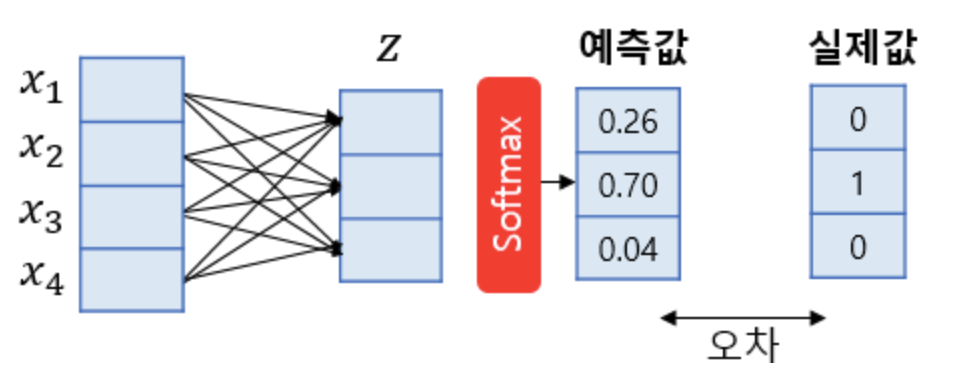
소프트맥스 함수는 클래스가 N개일 때, N차원의 벡터가 '각 클래스가 정답일 확률'을 표현하도록 정규화해주는 함수입니다. 예를 들어 위의 그림은 4차원의 벡터를 입력으로 받으면서 3개의 클래스를 가지는 경우의 소프트맥스 회귀의 동작 과정을 보여주고 있습니다. 3개의 클래스 중 1개의 클래스를 예측해야 하므로 소프트맥스 회귀의 출력은 3차원의 벡터고, 각 벡터의 차원은 특정 클래스일 확률입니다. 오차와 실제값의 차이를 줄이는 과정에서 가중치와 편향이 학습됩니다.

사이킷런에서 소프트맥스 회귀는 LogisticRegression()을 통해서 구현할 수 있습니다.

In [ ]:
# 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

In [ ]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

80%의 정확도를 얻었습니다. 지금까지의 모델 중 가장 높은 정확도를 얻었습니다.

### 선형 서포트 벡터 머신(Linear Support Vector Machine)
---
서포트 벡터 머신(SVM)은 대표적인 선형 분류 알고리즘입니다.

아래의 영상을 통해 서포트 벡터 머신에 대해서 이해해 보겠습니다.

https://youtu.be/y4CYcpRiNsw

많은 선형 분류 모델은 태생적으로는 이진 분류만을 지원하는 이진 분류 모델입니다. (위에서 설명한 로지스틱 회귀는 예외입니다.) 서포트 벡터 머신의 구현체인 사이킷런의 LinearSVC 또한 태생적으로는 이진 분류를 위한 모델입니다. 그런데 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 사용하는 방법이 있습니다. 바로 일대다(one-vs.-rest 또는 one-vs.-all) 방법입니다. 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킵니다.

결국 클래스의 수만큼 이진 분류 모델이 만들어집니다. 예측할 때는 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택합니다. 서포트 벡터 머신을 사용하여 로이터 뉴스를 분류해 봅시다.

In [ ]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

In [ ]:
# Linear SVC 테스트 데이터에 대한 예측해보세요
#예측값과 실제값 비교해보세요

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

## 5-8. 다양한 머신러닝 모델 사용해보기 (2)

### 결정 트리(Decision Tree)
---
결정 트리는 분류와 회귀 문제에 널리 사용하는 모델입니다. 기본적으로 결정 트리는 결정에 다다르기 위해 '예/아니오' 질문을 이어 나가면서 학습합니다. 이 질문은 스무고개 놀이의 질문과 비슷합니다. 아래의 영상을 통해서 결정 트리에 대해서 이해해 봅시다.

https://youtu.be/n0p0120Gxqk

사이킷런에서는 DecisionTreeClassifier()를 사용해서 결정 트리를 구현할 수 있습니다. 결정 트리의 깊이는 max_depth라는 인자를 통해서 정해줄 수 있습니다.

In [ ]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

In [ ]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

지금까지의 모델 중 가장 낮은 정확도인 62%를 얻습니다. 사실 트리 계열의 모델들은 고차원이고 희소한 데이터에 대해서는 성능이 나오지 않는다는 특징이 있습니다. DTM이나 TF-IDF 행렬의 경우 고차원이면서 대부분의 값이 0인 희소한 데이터이므로 트리 계열의 모델보다는 선형 분류 모델을 통해 접근하는 것이 더 나은 접근일 수 있습니다.

### 랜덤 포레스트(Random Forest)
---
앙상블(Ensemble) 이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법입니다. 뒤에서 보팅(Voting)이라는 앙상블 기법을 알아볼 텐데, 모델 자체가 앙상블을 사용하는 앙상블 모델들도 존재합니다. 랜덤 포레스트와 그래디언트 부스팅 트리는 결정 트리를 사용하는 앙상블 모델입니다.

랜덤 포레스트에 관한 아래의 영상을 통해서 이해해 보겠습니다.

https://youtu.be/nZB37IBCiSA



In [ ]:
#estimator를 5로 설정하고 random_state를 0으로 설정한 RandomForestClassifier를 선언해주세요.
#참고자료 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5, random_state = 0)
forest.fit(tfidfv, y_train)

In [ ]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

### 그래디언트 부스팅 트리(GradientBoostingClassifier)
---
그래디언트 부스팅 트리는 여러 개의 결정 트리를 묶어 만드는 앙상블 모델입니다. 그레디언트 부스팅은 랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듭니다.

그래디언트 부스팅 트리는 일부 특성을 무시한다는 특징을 가지고 있습니다. 그래서 보통 랜덤 포레스트를 먼저 사용해보고, 성능이나 예측 시간 면에서 만족스럽지 않은 경우에 그래디언트 부스팅 트리를 시도해보는 것이 좋습니다.

일반적으로 1 ~ 5 정도의 깊지 않은 트리를 사용하므로 메모리도 적게 사용하고 예측도 빠릅니다.

정확도도 준수하고, 특히 예측 속도가 빠르다는 점에서 데이터 경진 대회에서 많은 우승을 했던 모델입니다. 다만, 훈련 시간의 속도가 좀 오래 걸리고, 트리 기반 모델의 특성으로 인해서 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다는 단점이 있습니다.

현재 우리가 사용하는 TF-IDF 행렬은 희소하고 고차원 데이터지만, 결정 트리나 랜덤 포레스트보다 더 높은 성능을 얻을 수 있을지 한번 테스트해 볼까요?

저는 아래 코드 실행에 약 12분 정도 소요되었습니다. verbose=3을 GradientBoostingClassifier안에 인자로 넣어 진행 상황을 확인할 수 있으니 참고해 주세요!

In [ ]:
# 15분 정도 소요될 수 있습니다.
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

In [ ]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

76%의 정확도로 결정 트리와 랜덤 포레스트와 비교하여 좋은 성능을 얻었습니다.



### 보팅(Voting)
---

데이터 경진 대회 캐글(Kaggle)에서 상위권을 차지한 많은 솔루션들이 앙상블(Ansemble learning)이라는 방법을 사용합니다. 그 중에서 투표를 통해 결과를 도출하는 보팅(Voting) 이라는 방법에 대해서 이해해 봅시다.

https://youtu.be/y4Wh0E1d4oE



In [ ]:
# 20분 이상 소요될 수 있습니다.
# Voting을 구현해보세요. (Voing은 'soft'로 설정)
# 조건1 : 로지스틱회귀를 사용해주세요(패널티는 'L2'로 설정)
# 조건 2: Complement Naive Bayes Classifier를 사용해주세요
# 조건 3: GradientBoosting Classifier를 사용해주세요
# 참고자료 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier

voting_classifier =  VotingClassifier(estimators=[('lr', lr), ('cb', cb), ('grbt', grbt)], voting='soft')
voting_classifier.fit(tfidfv, y_train)

In [ ]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# 6. 뉴스 카테고리 다중분류 [프로젝트]

## 6-1. 프로젝트: Vocabulary Size를 변경해서 시도해보기

지금까지는 모델을 변경하고, 모델을 조합해서 성능을 올리는 일에 힘썼습니다. 그런데 어쩌면 성능을 높이는 방법은 단순히 모델을 조정하는 일에 한정되지 않을 수 있습니다. 데이터의 전처리는 모델의 성능에 영향을 직접적으로 줍니다. 특히나 Bag of Words를 기반으로 하는 DTM이나 TF-IDF의 경우, 사용하는 단어의 수를 어떻게 결정하느냐에 따라서 성능에 영향을 줄 수 있겠죠.

중요도가 낮은 단어들까지 포함해 너무 많은 단어를 사용하는 경우에도 성능이 저하될 수 있고, 반대로 너무 적은 단어들을 사용해도 성능이 저하될 수 있습니다. 이렇게 변화된 단어의 수는 또 어떤 모델을 사용하느냐에 따라 유리할 수도, 불리할 수도 있습니다.

단어의 수에 따라서 모델의 성능이 어떻게 변하는지 테스트해 봅시다.

> (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

앞서 num_words로 사용할 단어의 수를 조정할 수 있다는 것을 배웠습니다. 빈도수가 많은 순서대로 나열했을 때, num_words의 인자로 준 정숫값만큼의 단어를 사용하고 나머지 단어는 전부 <unk>로 처리하는 원리였었죠.

아래의 두 가지 경우에 대해서 지금까지 사용했던 모델들의 정확도를 직접 확인해 보세요.

### 라이브러리 버전을 확인해 봅니다
---
사용할 라이브러리 버전을 둘러봅시다.


In [ ]:
import tensorflow
import matplotlib
import seaborn
import numpy
import pandas
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

### 1. 모든 단어 사용

> (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)


In [ ]:
(x_train_all_words, y_train_all_words), (x_test_all_words, y_test_all_words) = reuters.load_data(num_words=None, test_split=0.2)

In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train_all_words)))
print('테스트 샘플의 수: {}'.format(len(x_test_all_words)))

In [ ]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train_all_words)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train_all_words))/len(x_train_all_words)))

plt.hist([len(s) for s in x_train_all_words], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_all_words)
plt.show()

In [ ]:
decoded = []
for i in range(len(x_train_all_words)):
    t = ' '.join([index_to_word[index] for index in x_train_all_words[i]])
    decoded.append(t)

x_train_all_words = decoded
print(len(x_train_all_words))

In [ ]:
decoded = []
for i in range(len(x_test_all_words)):
    t = ' '.join([index_to_word[index] for index in x_test_all_words[i]])
    decoded.append(t)

x_test_all_words = decoded
print(len(x_test_all_words))

In [ ]:
dtmvector = CountVectorizer()
x_train_dtm_all_words = dtmvector.fit_transform(x_train_all_words)
print(x_train_dtm_all_words.shape)

In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv_all_words = tfidf_transformer.fit_transform(x_train_dtm_all_words)
print(tfidfv_all_words.shape)

In [ ]:
model_all_words = MultinomialNB()
model_all_words.fit(tfidfv_all_words, y_train_all_words)

In [ ]:
x_test_dtm_all_words = dtmvector.transform(x_test_all_words) #테스트 데이터를 DTM으로 변환
tfidfv_test_all_words = tfidf_transformer.transform(x_test_dtm_all_words) #DTM을 TF-IDF 행렬로 변환

predicted_all_words = model_all_words.predict(tfidfv_test_all_words) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_all_words, predicted_all_words)) #예측값과 실제값 비교

### 2. 빈도수 상위 5,000개의 단어만 사용
---
> (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)




In [ ]:
(x_train_5000_words, y_train_5000_words), (x_test_5000_words, y_test_5000_words) = reuters.load_data(num_words=5000, test_split=0.2)

In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train_5000_words)))
print('테스트 샘플의 수: {}'.format(len(x_test_5000_words)))

In [ ]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train_5000_words)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train_5000_words))/len(x_train_5000_words)))

plt.hist([len(s) for s in x_train_5000_words], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_5000_words)
plt.show()

In [ ]:
decoded = []
for i in range(len(x_train_5000_words)):
    t = ' '.join([index_to_word[index] for index in x_train_5000_words[i]])
    decoded.append(t)

x_train_5000_words = decoded
print(len(x_train_5000_words))

In [ ]:
decoded = []
for i in range(len(x_test_5000_words)):
    t = ' '.join([index_to_word[index] for index in x_test_5000_words[i]])
    decoded.append(t)

x_test_5000_words = decoded
print(len(x_test_5000_words))

In [ ]:
dtmvector = CountVectorizer()
x_train_dtm_5000_words = dtmvector.fit_transform(x_train_5000_words)
print(x_train_dtm_5000_words.shape)

In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv_5000_words = tfidf_transformer.fit_transform(x_train_dtm_5000_words)
print(tfidfv_5000_words.shape)

In [ ]:
model_5000_words = MultinomialNB()
model_5000_words.fit(tfidfv_5000_words, y_train_5000_words)

In [ ]:
x_test_dtm_5000_words = dtmvector.transform(x_test_5000_words) #테스트 데이터를 DTM으로 변환
tfidfv_test_5000_words = tfidf_transformer.transform(x_test_dtm_5000_words) #DTM을 TF-IDF 행렬로 변환

predicted_5000_words = model_5000_words.predict(tfidfv_test_5000_words) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_5000_words, predicted_5000_words)) #예측값과 실제값 비교

### 3. 직접 단어 개수를 설정해서 사용

위 단계에서 5000으로 제시된 num_words를 다양하게 바꾸어 가며 성능을 확인해보세요. 변화된 단어 수에 따른 모델의 성능을 연구해 보세요. 최소 3가지 경우 이상을 실험해 보기를 권합니다.

> 사용할 모델  
나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

### 4. 딥러닝 모델과 비교해 보기
---
위 과정을 통해 나온 최적의 모델과 단어 수 조건에서, 본인이 선택한 다른 모델을 적용한 결과와 비교해 봅시다. 감정 분석 등에 사용했던 RNN이나 1-D CNN 등의 딥러닝 모델 중 하나를 선택해서 오늘 사용했던 데이터셋을 학습해 보고 나오는 결과를 비교해 봅시다. 단, 공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.